In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df=pd.read_csv("country.csv")

In [3]:
df.head()

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Corruption_Index  20 non-null     int64  
 2   Gini_Index        20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [5]:
X=sm.add_constant(df['Gini_Index'])

In [6]:
X.head(5)

,const,Gini_Index
0,1.0,53.7
1,1.0,30.2
2,1.0,46.2
3,1.0,32.7
4,1.0,36.5


In [7]:
Y=df["Corruption_Index"]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

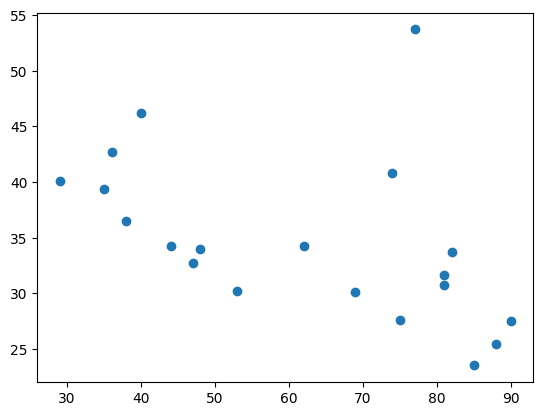

In [9]:
plt.scatter(x='Corruption_Index',y="Gini_Index",data=df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 100 )

In [12]:
df_lm=sm.OLS(train_y,train_X).fit()

In [13]:
df_lm.summary2()

C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.070   
Dependent Variable: Corruption_Index AIC:                140.5223
Date:               2023-08-16 11:27 BIC:                142.0674
No. Observations:   16               Log-Likelihood:     -68.261 
Df Model:           1                F-statistic:        2.126   
Df Residuals:       14               Prob (F-statistic): 0.167   
R-squared:          0.132            Scale:              339.78  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const        95.2224   21.6919   4.3898  0.0006  48.6980  141.7468
Gini_Index   -0.8976    0.6155  -1.4582  0.1668  -2.2177    0.4226
-----------------------------------------------------------------
Omnibus:               1.936        Durbin-Watson:          2.195
Prob(Omnibus):         0.380        Jarque-Bera (JB):       0.999
Skew:                  -0.169       Prob(JB):               0.607
Kurtosis:              1.823        Condition No.:          166  
=================================================================

"""

In [14]:
print(df_lm.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:       Corruption_Index   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.126
Date:                Wed, 16 Aug 2023   Prob (F-statistic):              0.167
Time:                        11:27:41   Log-Likelihood:                -68.261
No. Observations:                  16   AIC:                             140.5
Df Residuals:                      14   BIC:                             142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         95.2224     21.692      4.390      0.0

C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
conf_intervals = df_lm.conf_int(alpha=0.05)  # For 95% confidence
print(conf_intervals)

                    0           1
const       48.697986  141.746773
Gini_Index  -2.217707    0.422578


In [16]:
print(df_lm.params)

const         95.222379
Gini_Index    -0.897565
dtype: float64


<Figure size 800x600 with 0 Axes>

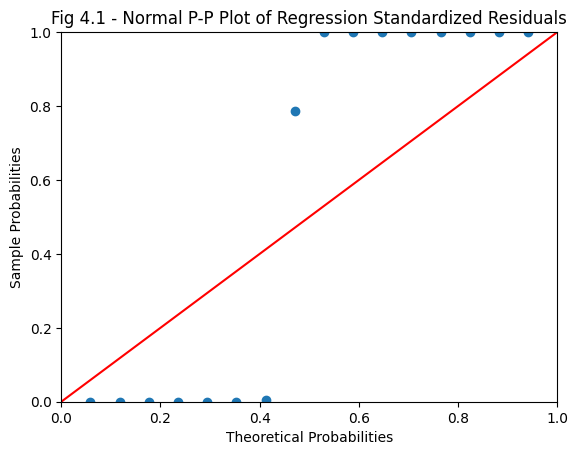

In [17]:
df_resid = df_lm.resid
probplot = sm.ProbPlot( df_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [18]:
def get_standardized_values( vals ):    
    return (vals - vals.mean())/vals.std()

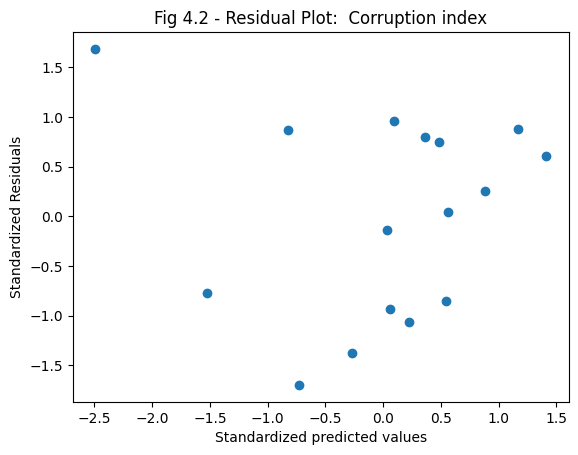

In [19]:
plt.scatter( get_standardized_values( df_lm.fittedvalues ), 
            get_standardized_values( df_resid ) )
plt.title( "Fig 4.2 - Residual Plot:  Corruption index" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [20]:
from scipy.stats import zscore

In [21]:
df['z_score_Corruption'] = zscore(df.Corruption_Index)

In [22]:
df[ (df.z_score_Corruption > 3.0) | (df.z_score_Corruption < -3.0) ]

,Country,Corruption_Index,Gini_Index,z_score_Corruption


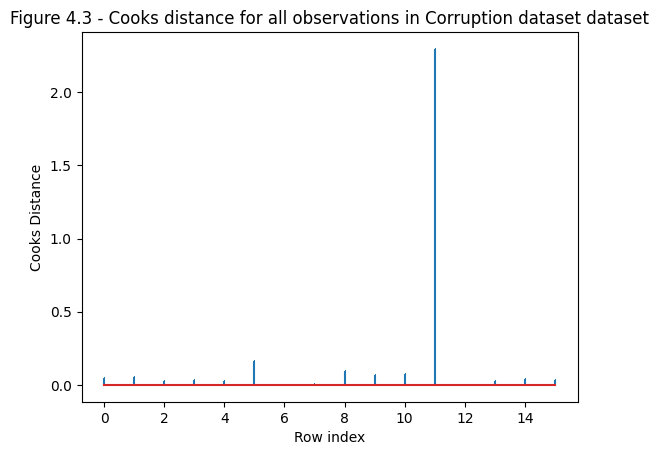

In [23]:

df_influence = df_lm.get_influence()
(c, p) = df_influence.cooks_distance

plt.stem( np.arange( len( train_X) ), 
         np.round( c, 3 ), 
         markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in Corruption dataset dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

In [24]:
#In cook's distance if the value is greater than 1 for some data point, that data point is an outlier and we have to take care of it. 

In [25]:
df

,Country,Corruption_Index,Gini_Index,z_score_Corruption
0,Hong Kong,77,53.7,0.761383
1,South Korea,53,30.2,-0.432943
2,China,40,46.2,-1.079869
3,Italy,47,32.7,-0.731524
4,Mongolia,38,36.5,-1.179396
5,Austria,75,27.6,0.661855
6,Norway,85,23.5,1.159491
7,UK,81,31.6,0.960437
8,Canada,82,33.7,1.010200
9,Germany,81,30.7,0.960437


In [26]:
df[df.index.isin([11])]

,Country,Corruption_Index,Gini_Index,z_score_Corruption
11,Denmark,90,27.5,1.408309


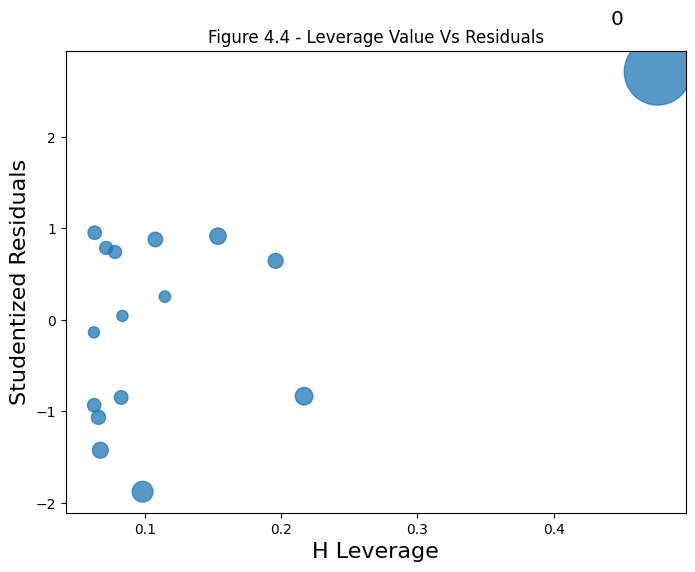

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( df_lm, ax = ax )
plt.title( "Figure 4.4 - Leverage Value Vs Residuals")
plt.show();

In [28]:
df[df.index.isin([0])]

,Country,Corruption_Index,Gini_Index,z_score_Corruption
0,Hong Kong,77,53.7,0.761383


In [29]:
pred_y = df_lm.predict( test_X )

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))

0.09564052280706992

In [31]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y))

21.53262175080755

In [32]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Predict the y values
pred_y = df_lm.predict( test_X )

# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( df_lm, 
                   test_X,
                   alpha = 0.1)

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'Gini_Index': test_X['Gini_Index'],
                            'pred_y': pred_y,
                            'pred_y_left': pred_y_low,
                            'pred_y_right': pred_y_high } )

In [33]:
pred_y_df[0:10]

,Gini_Index,pred_y,pred_y_left,pred_y_right
17,42.7,56.896373,22.252720,91.540026
19,39.4,59.858336,25.963055,93.753617
11,27.5,70.539354,36.239028,104.839680
18,34.2,64.525672,31.059073,97.992270
